In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## "No abras el archivo desde aqui porque se va a duplicar la columna de sentimiento. Abrir despues de los graficos de la primer entrega"

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Proyecto Final Henry/df_final.csv')

In [ ]:
df.head(1)

,business_id,business_name,address,city,state,latitude,longitude,stars_business,review_count,categories,attributes,user_id,stars_by_user,review_text,review_date
0,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,no direction,Meridian,Florida,43.643494,-116.436,5.0,5,Local Services Appliances Repair,Business Accepts Credit Cards,9drwrG9N1ynDAajJSTzDhw,5.0,"I had an issue with my washing machine, and sc...",2019-04-24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915358 entries, 0 to 915357
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     915358 non-null  object 
 1   business_name   915358 non-null  object 
 2   address         915358 non-null  object 
 3   city            915358 non-null  object 
 4   state           915358 non-null  object 
 5   latitude        915358 non-null  float64
 6   longitude       915358 non-null  float64
 7   stars_business  915358 non-null  float64
 8   review_count    915358 non-null  int64  
 9   categories      915358 non-null  object 
 10  attributes      915358 non-null  object 
 11  user_id         915358 non-null  object 
 12  stars_by_user   915358 non-null  float64
 13  review_text     915358 non-null  object 
 14  review_date     915358 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 104.8+ MB


Análisis de sentimiento en reseñas

In [ ]:
from textblob import TextBlob

def analizar_sentimiento(texto):
    if isinstance(texto, str):
        testimonio = TextBlob(texto)
        polaridad = testimonio.sentiment.polarity
        if polaridad > 0:
            return 'Positiva'
        elif polaridad < 0:
            return 'Negativa'
        else:
            return 'Neutral'
    else:
        return 'No es un testimonio válido'

df['sentimiento'] = df['review_text'].apply(analizar_sentimiento)

In [ ]:
filtrados = df[df['sentimiento'] == 'No es un testimonio válido']
cantidad_invalidos = len(filtrados)
print("La cantidad de 'No es un testimonio válido' es:", cantidad_invalidos)

La cantidad de 'No es un testimonio válido' es: 0


In [ ]:
df.head(2)

,business_id,business_name,address,city,state,latitude,longitude,stars_business,review_count,categories,attributes,user_id,stars_by_user,review_text,review_date,sentimiento
0,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,no direction,Meridian,Florida,43.643494,-116.436,5.0,5,Local Services Appliances Repair,Business Accepts Credit Cards,9drwrG9N1ynDAajJSTzDhw,5.0,"I had an issue with my washing machine, and sc...",2019-04-24,Positiva
1,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,no direction,Meridian,Florida,43.643494,-116.436,5.0,5,Local Services Appliances Repair,Business Accepts Credit Cards,CaPqQ3O4rCQ7ynslyvvaNw,5.0,Very convenient to schedule online. Day before...,2019-10-31,Positiva


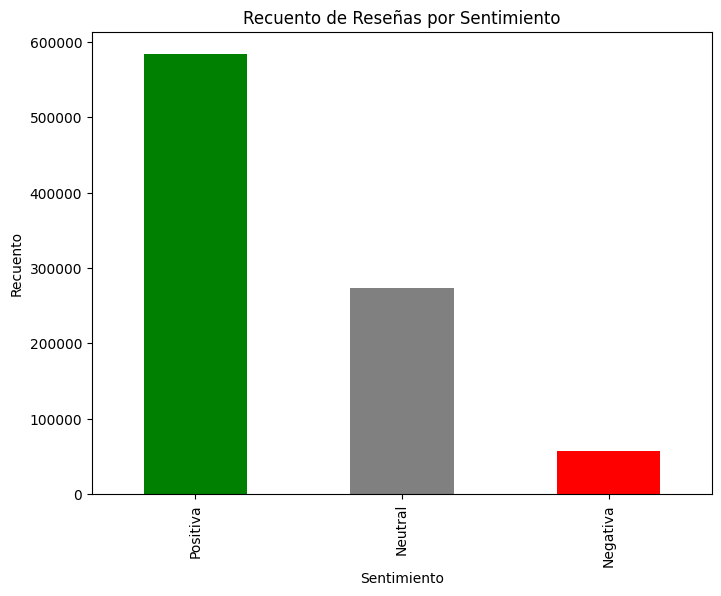

In [ ]:
conteo_sentimiento = df['sentimiento'].value_counts()

plt.figure(figsize=(8, 6))
conteo_sentimiento.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Recuento de Reseñas por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Recuento')
plt.show()


In [ ]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['año'] = df['review_date'].dt.year


In [ ]:
df['año'].unique()

array([2019, 2017, 2022, 2016, 2018, 2020, 2021, 2015, 2014, 2012, 2013,
       2009, 2011, 2008, 2007, 2010, 2005, 2006])

Análisis de sentimiento por año

In [ ]:
total_positivos = (df['sentimiento'] == 'Positiva').sum()
print("Total de sentimientos positivos:", total_positivos)

Total de sentimientos positivos: 584092


In [ ]:
total_positivos = (df['sentimiento'] == 'Negativa').sum()
print("Total de sentimientos negativos:", total_positivos)

Total de sentimientos negativos: 57382


In [ ]:
total_positivos = (df['sentimiento'] == 'Neutral').sum()
print("Total de sentimientos neutral:", total_positivos)

Total de sentimientos neutral: 273884


In [ ]:
import re

df['categories'] = df['categories'].apply(lambda x: ' '.join(re.findall(r'[A-Z][a-z]*', x)))
print(df['categories'].head())


0    Local Services Appliances Repair
1    Local Services Appliances Repair
2    Local Services Appliances Repair
3    Local Services Appliances Repair
4    Local Services Appliances Repair
Name: categories, dtype: object


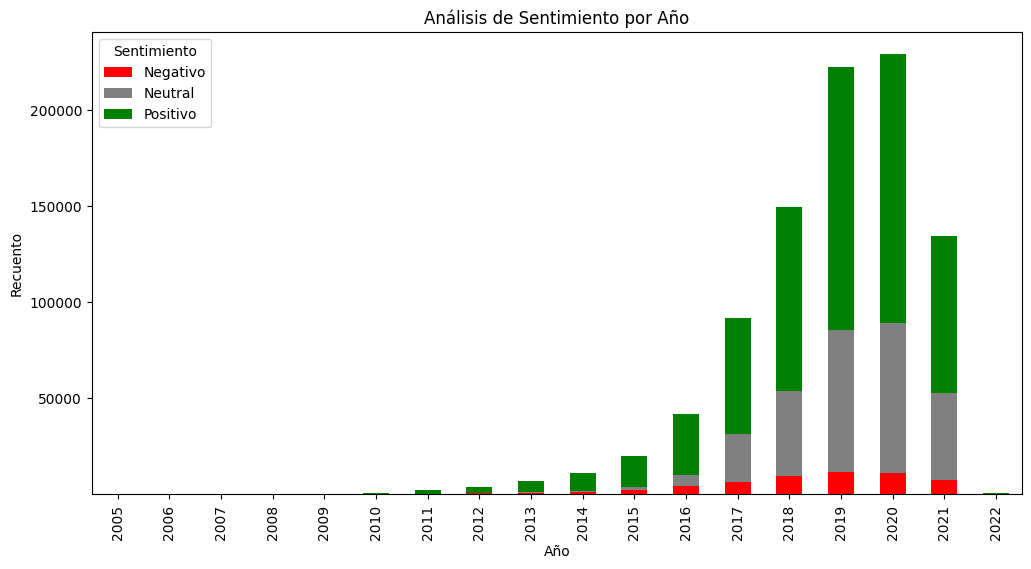

In [ ]:
sentimiento_por_año = df.groupby(['año', 'sentimiento']).size().unstack(fill_value=0)

colores = ['red','grey','green']

ax = sentimiento_por_año.plot(kind='bar', stacked=True, figsize=(12, 6), color=colores)

plt.title('Análisis de Sentimiento por Año')
plt.xlabel('Año')
plt.ylabel('Recuento')
plt.legend(title='Sentimiento', labels=['Negativo','Neutral','Positivo'])
plt.show()



Estados con el promedio de calificacion mas alta

<Figure size 1200x600 with 0 Axes>

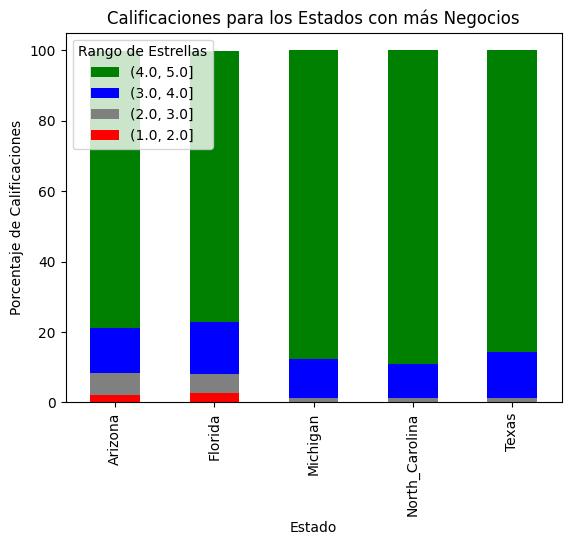

In [ ]:
estados_mas_negocios = df['state'].value_counts().head(5)
df_filtrado = df[df['state'].isin(estados_mas_negocios.index)]

rango_estrellas = [1.0, 2.0, 3.0, 4.0, 5.0]
porcentajes_por_estado = df_filtrado.groupby('state')['stars_business'].apply(lambda x: (x.groupby(pd.cut(x, rango_estrellas)).count() / x.count()) * 100)
colores = ['red', 'grey', 'blue', 'green', 'orange']

plt.figure(figsize=(12, 6))
ax = porcentajes_por_estado.unstack().plot(kind='bar', stacked=True, color=colores)
plt.title('Calificaciones para los Estados con más Negocios')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Calificaciones')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Rango de Estrellas', loc='upper left')

plt.show()



In [ ]:
conteo_ciudades = df['city'].value_counts()
print(conteo_ciudades)


no information    58862
Tucson            17156
Philadelphia      15223
Tampa             11630
Reno              11186
                  ...  
St. Ann               5
Mandeville            5
Wyncote               5
Fountainville         5
Eastampton            5
Name: city, Length: 5200, dtype: int64


Cuidades con mas negocios

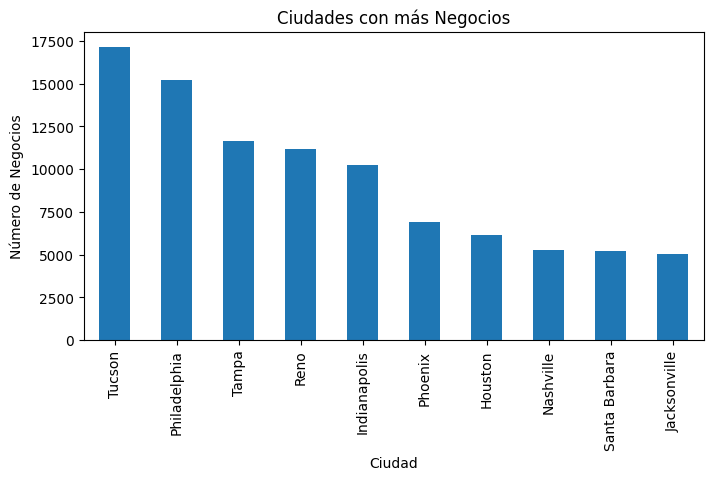

In [ ]:
conteo_ciudades = df[df['city'] != 'no information']['city'].value_counts()
ciudades_con_mas_negocios = conteo_ciudades.sort_values(ascending=False)
n_ciudades = 10

plt.figure(figsize=(8, 4))
ciudades_con_mas_negocios.head(n_ciudades).plot(kind='bar')
plt.title('Ciudades con más Negocios')
plt.xlabel('Ciudad')
plt.ylabel('Número de Negocios')
plt.show()


Palabras mas comunes en los atributos

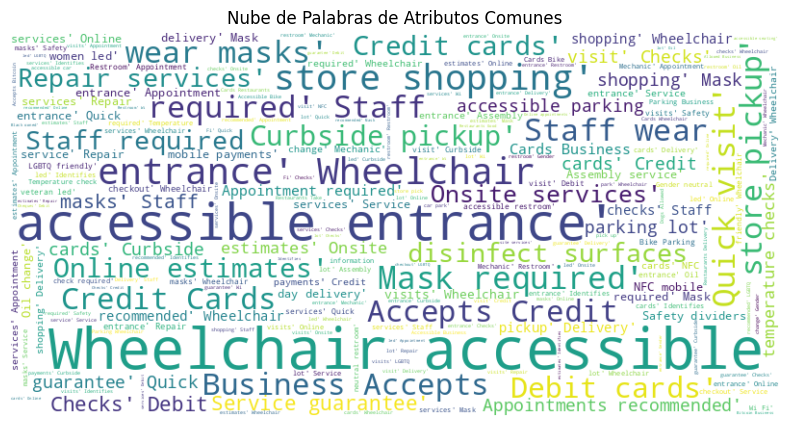

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

atributos_texto = ' '.join(str(attr) for attr in df['attributes'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(atributos_texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Atributos Comunes')
plt.show()


In [ ]:
palabras_frecuencias = wordcloud.words_
lista_palabras_frecuencias = list(palabras_frecuencias.items())
lista_palabras_frecuencias.sort(key=lambda x: x[1], reverse=True)

palabras_comunes = lista_palabras_frecuencias[:10]

for palabra, frecuencia in palabras_comunes:
    print(f'{palabra}: {frecuencia}')

Wheelchair accessible: 1.0
accessible entrance': 0.8056470082253643
entrance' Wheelchair: 0.3826202892317617
store shopping': 0.3701693457341003
Mask required': 0.29729799473146606
required' Staff: 0.2702929950002688
Staff wear: 0.26906295360464494
wear masks': 0.26906295360464494
Quick visit': 0.2627987742594484
store pickup': 0.26221600989194127


## "Abrir desde aqui"

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Proyecto Final Henry/df_final.csv')

In [ ]:
print(type(df['attributes'].iloc[915357]))

<class 'str'>


In [ ]:
df['attributes'] = df['attributes'].str.replace(r'\[|\]|,', '', regex=True)


In [9]:
df.describe()

,latitude,longitude,stars_business,review_count,stars_by_user
count,915358.000000,915358.000000,915358.000000,915358.000000,915358.000000
mean,37.194813,-91.156825,4.396422,159.644413,4.355408
std,5.227075,14.556614,0.663092,330.591931,1.297957
min,19.687933,-157.931413,1.000000,5.000000,1.000000
25%,33.465945,-97.771112,4.200000,35.000000,4.000000
50%,38.689524,-86.089424,4.600000,68.000000,5.000000
75%,40.864492,-80.825964,4.800000,158.000000,5.000000
max,64.895483,-67.288786,5.000000,9728.000000,5.000000


Esta descripción nos dice que:

1. La mayoría de los comercios tienen una alta calificación ya que el rango va de 1 a 5 y la media es de 4.40.  
2. La columna review-count muestra una gran variedad en las vistas desde 5 a 9728, que podria tratarse de un outlier (examinar)
3. La mayoria de los usuarios aplica calificaciones altas (4.35)
4. Nuestro cliente tiene una calificacion promedio pordebajo de la media ya que tiene 3.9.





## Observacion del Comportamiento de la columna 'review_count'

Se observa el comercio con mayor cantidad de vistas

In [10]:
index_max_review_count = df[df['review_count'] == 9728].index[0]
business_with_max_reviews = df.loc[index_max_review_count]
print(business_with_max_reviews)

business_id                   0x89c2e0fa94616227:0xee90b4c54e8bf449
business_name                                  Select Home Warranty
city                                                       NJ 07495
state                                                      New_York
latitude                                                  41.104481
longitude                                                -74.160903
stars_business                                                  4.1
review_count                                                   9728
categories                                        Appliance Plumber
attributes                         'Wheelchair-accessible entrance'
user_id                                       110014246987939565704
stars_by_user                                                   5.0
review_text       They have been great to me, everything has bee...
review_date                                              2020-10-01
sentimiento                                     

In [11]:
business_id = '0x89c2e0fa94616227:0xee90b4c54e8bf449'
business_reviews = df[df['business_id'] == business_id].count()
print(business_reviews)


business_id       15
business_name     15
city              15
state             15
latitude          15
longitude         15
stars_business    15
review_count      15
categories        15
attributes        15
user_id           15
stars_by_user     15
review_text       15
review_date       15
sentimiento       15
dtype: int64


Se listan los 10 comercios que mas veces figuran en el dataframe

In [12]:
business_counts = df['business_id'].value_counts()
print(business_counts.head(10))

MWAzAdxacgzj2I64jwv57g                   895
1fy9fS3UH2k4TfQcryNKkA                   788
0x8824b1d6560159f5:0x379bfff46b3390c6    598
ONuqtwn8euUIWumg3U_4DQ                   587
0x8875476f9a81635b:0x1621b9ee4ceb4882    558
0x8752f85671ccea41:0xcc43c41b656d2c09    544
0x88e5b509f0d87e65:0xf83639c9c6d2cc55    539
0x8644c847c0c6b0d3:0x80d931cba4c531d5    510
0x865c5e442d0d1a8d:0xfaa4552bf0fb8064    485
0x88d9c18ec9630729:0x43c1f05d4b9100ae    463
Name: business_id, dtype: int64


Se observan outliers

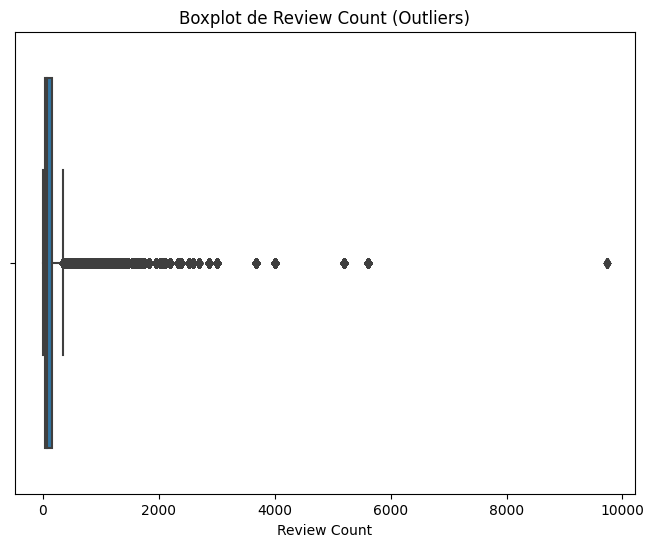

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='review_count')
plt.title('Boxplot de Review Count (Outliers)')
plt.xlabel('Review Count')

plt.show()


Se listan los comercios con mas de 2500 vistas que podrian ser outliers

In [14]:
comercios_con_mas_de_2500_vistas = df[df['review_count'] > 2500]
business_ids = comercios_con_mas_de_2500_vistas['business_id'].unique()
print(business_ids)


['0x88d9c18ec9630729:0x43c1f05d4b9100ae'
 '0x87f6284fffffffff:0xaaf9b0cdf07a5d57'
 '0x8824b1d6560159f5:0x379bfff46b3390c6'
 '0x88e5b509f0d87e65:0xf83639c9c6d2cc55'
 '0x880fccd90e5aae81:0x72f5476edcdcaa10'
 '0x8793f42c6d254d1d:0x9bd2af6af23a1dfd'
 '0x89c2e0fa94616227:0xee90b4c54e8bf449'
 '0x865c5e442d0d1a8d:0xfaa4552bf0fb8064'
 '0x89b7ad269d0c60fb:0x72f88442a330a273'
 '0x8644c847c0c6b0d3:0x80d931cba4c531d5']


Se deberá decidir que hacer con éstos registros dado que desvirtúan el informe

## Comportamiento de las variables 'star_business' y 'stars_by_user'

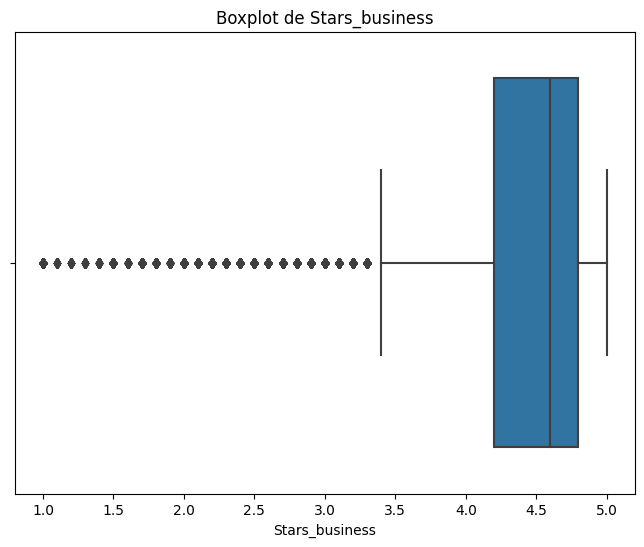

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stars_business')
plt.title('Boxplot de Stars_business')
plt.xlabel('Stars_business')

plt.show()

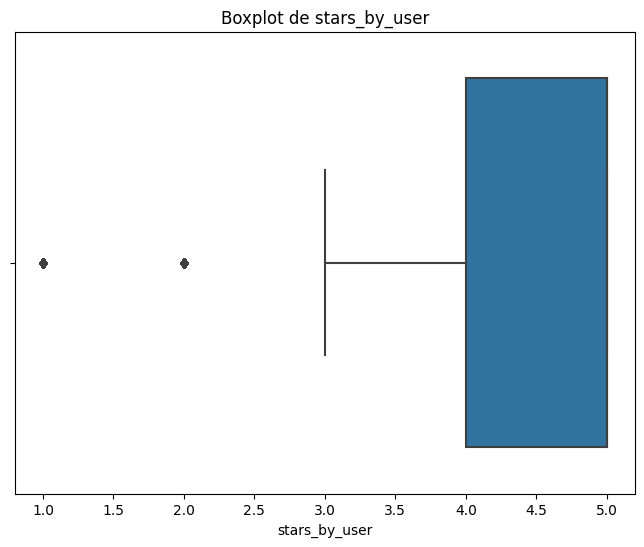

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stars_by_user')
plt.title('Boxplot de stars_by_user')
plt.xlabel('stars_by_user')

plt.show()

Columnas de 'stars_business' y 'stars_by_user' sin outliers

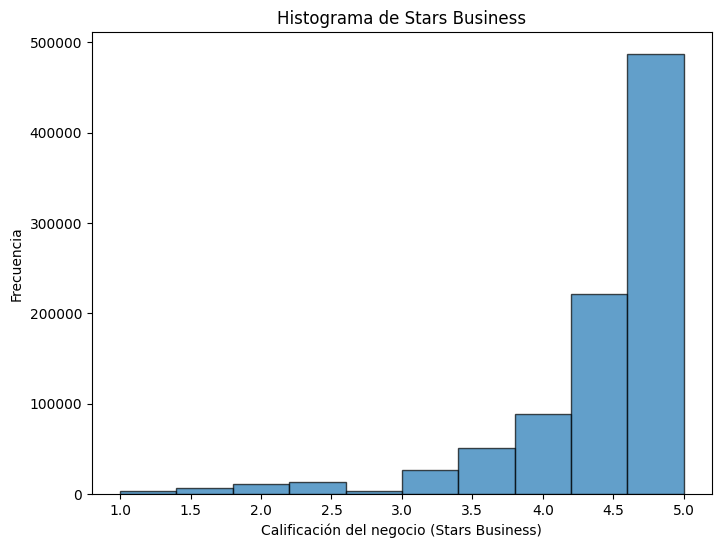

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['stars_business'], bins=10, edgecolor='k', alpha=0.7)

plt.xlabel('Calificación del negocio (Stars Business)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Stars Business')

plt.show()


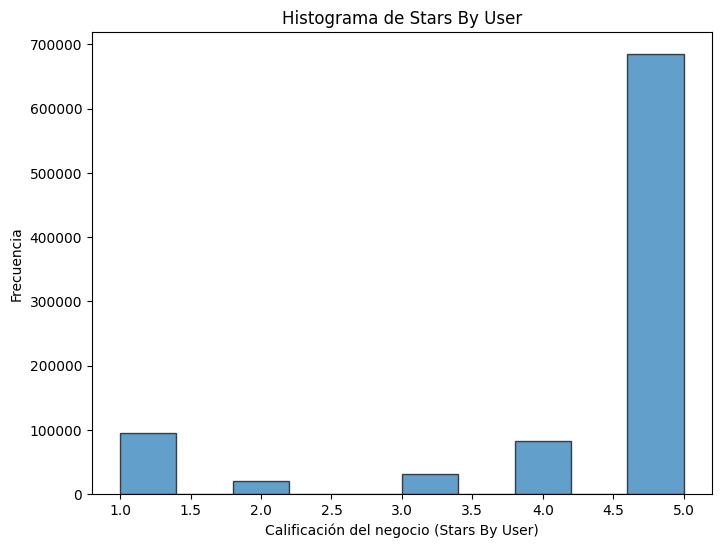

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['stars_by_user'], bins=10, edgecolor='k', alpha=0.7)

plt.xlabel('Calificación del negocio (Stars By User)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Stars By User')

plt.show()

Distribución de las calificaciones:


1. Casi la mitad del total de negocios tiene una calificación de 5, mientras que el 25% tiene una calificación de 4 y el 25% restante tiene una calificacion de entre 1 y 3.
2. Casi el 70% de los usuarios califica entre 4.5 y 5, mientras que el 10% califica con 1.



## Comportamiento de la variable 'categories'

In [19]:
categorias_cantidad = df['categories'].str.split(', ').explode().value_counts().reset_index()
categorias_cantidad.columns = ['Categoria', 'Cantidad']


In [20]:
categorias_cantidad = categorias_cantidad.sort_values(by='Cantidad', ascending=False)
print(categorias_cantidad.head(10))


     Categoria  Cantidad
0       Window     66889
1         Lawn     42744
2     Painting     41007
3      Plumber     36558
4          Air     33565
5         Home     28968
6        Glass     21319
7    Appliance     18513
8      Roofing     10832
9  Electrician     10222


In [21]:
categorias_cantidad = categorias_cantidad.sort_values(by='Cantidad', ascending=True)
print(categorias_cantidad.head(10))

                                              Categoria  Cantidad
9526  Landscaping Gardeners Nurseries Gardening Home...         5
9523  Home Services Painters Pressure Washers Contra...         5
9522  Arts Crafts Furniture Stores Professional Serv...         5
9521  Carpeting Home Services Flooring Building Supp...         5
9520  Local Services Home Services Contractors Appli...         5
9519  Shopping Personal Shopping Pet Services Pet Si...         5
9518  Contractors Siding Gutter Services Landscape A...         5
9517  Home Services Appliances Local Services Buildi...         5
9516   Tree Services Home Services Firewood Landscaping         5
9515  Home Garden Home Services Shopping Appliances ...         5


In [22]:
categorias_resenas = df.groupby('categories')['review_count'].sum().reset_index()

In [23]:
categorias_resenas = categorias_resenas.sort_values(by='review_count', ascending=False)

In [24]:
print((categorias_resenas).head(10))

                                   categories  review_count
9311                                   Window       8425368
7241                                  Plumber       8249467
2252                                   Debris       4808121
11                                        Air       4476299
3750  Heating Air Air Furnace H V A C Plumber       4302950
6264                                     Lawn       3908849
7420                            Plumber Water       3682397
3538                  H V A C Air Air Heating       2806909
320                                 Appliance       2690320
375              Appliance Refrigerator Small       2571692


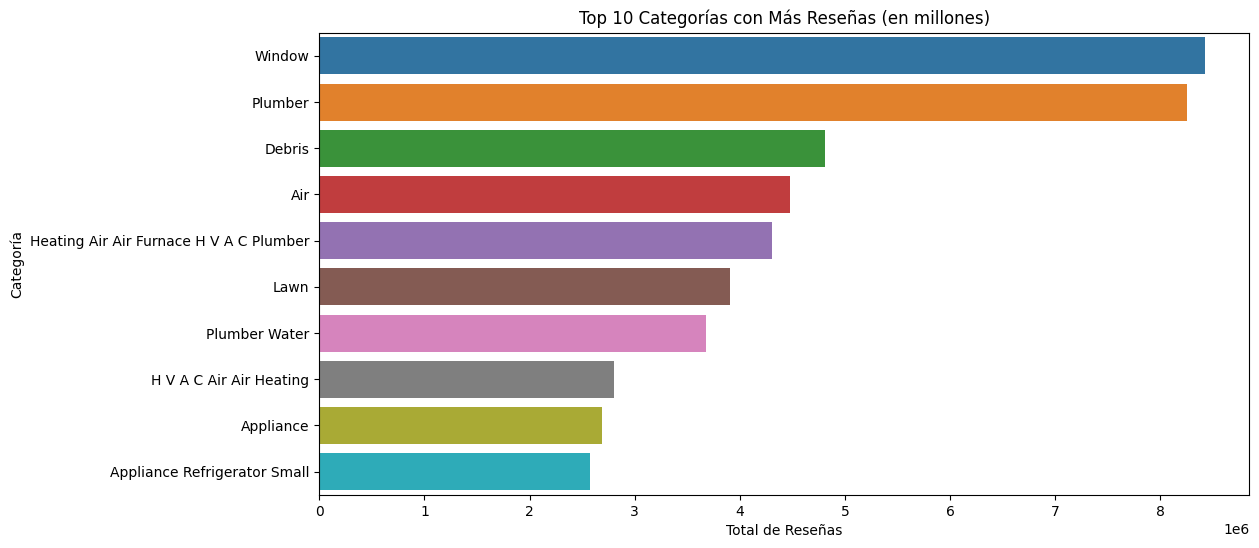

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='review_count', y='categories', data=categorias_resenas.head(10))
plt.xlabel('Total de Reseñas')
plt.ylabel('Categoría')
plt.title('Top 10 Categorías con Más Reseñas (en millones)')
plt.show()


In [26]:
categorias_resenas2 = categorias_resenas.sort_values(by='review_count', ascending=True)

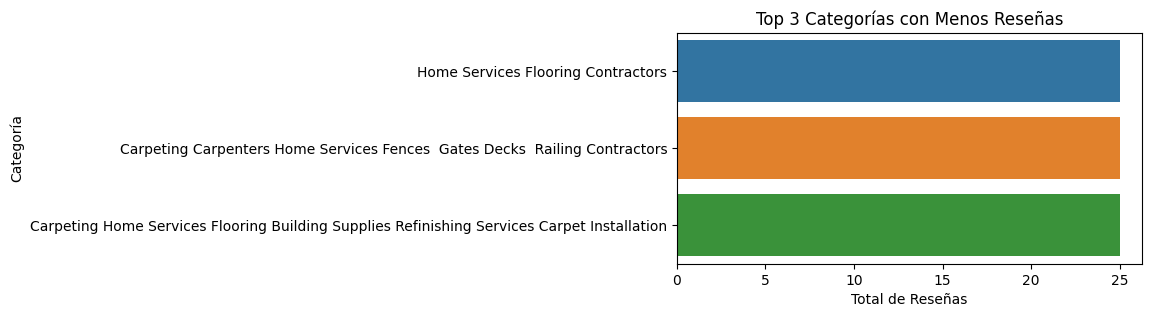

In [ ]:
plt.figure(figsize=(6, 3))
sns.barplot(x='review_count', y='categories', data=categorias_resenas2.head(3))
plt.xlabel('Total de Reseñas')
plt.ylabel('Categoría')
plt.title('Top 3 Categorías con Menos Reseñas')
plt.show()


Los comercios que tienen mas reseñas son los relacionados con la fontanería, tinte para ventanas, y servicios de aire acondicionado y refrigeración en general. Los comercios que menos reseñas tienen son los que ofrecen servicios de pisos, alfombrados.

In [ ]:
# guardo el resultado en un csv
ruta_guardar = '/content/drive/My Drive/Proyecto Final Henry/df_final.csv'
df.to_csv(ruta_guardar, index=False)  # index=False evita que se guarde el índice del DataFrame en el archivo